In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from prophet import Prophet

/Users/manikshakya/anaconda3/envs/hgp/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
# Load the dataset
data = pd.read_csv('PG.csv')

In [3]:
# Extract the date and closing prices
dates = pd.to_datetime(data['Date'])
closing_prices = data['Close']

In [4]:
# Convert closing prices to a pandas Series
closing_prices = pd.Series(closing_prices)
closing_prices

0      123.410004
1      122.580002
2      122.750000
3      121.989998
4      122.510002
          ...    
751    152.619995
752    153.949997
753    151.960007
754    152.589996
755    151.559998
Name: Close, Length: 756, dtype: float64

# Technical Analysis & Monte Carlo Simulation

In [5]:
# Calculate the 20-day moving average
moving_average = closing_prices.rolling(window=20).mean()
moving_average

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    150.428001
752    150.795500
753    151.119501
754    151.291000
755    151.406500
Name: Close, Length: 756, dtype: float64

In [6]:
# Calculate the standard deviation of the closing prices
std_deviation = closing_prices.rolling(window=20).std()
std_deviation

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
751    1.919256
752    1.850137
753    1.377241
754    1.333250
755    1.244217
Name: Close, Length: 756, dtype: float64

In [7]:
# Calculate the upper and lower Bollinger Bands
upper_band = moving_average + (2 * std_deviation)
lower_band = moving_average - (2 * std_deviation)

print(upper_band)
print(lower_band)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    154.266512
752    154.495773
753    153.873983
754    153.957500
755    153.894934
Name: Close, Length: 756, dtype: float64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    146.589489
752    147.095227
753    148.365018
754    148.624500
755    148.918067
Name: Close, Length: 756, dtype: float64


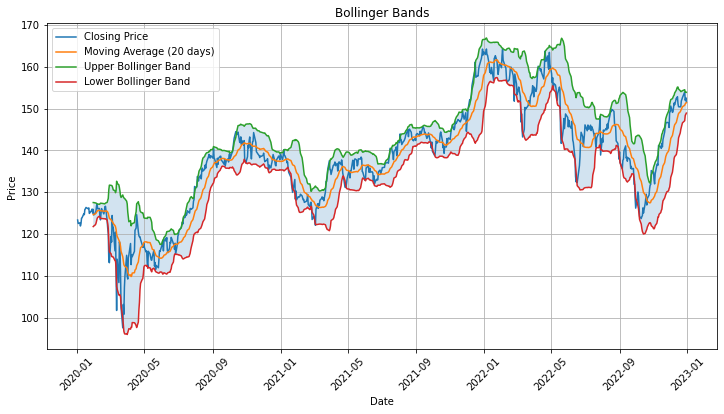

In [8]:
# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Closing Price')
plt.plot(dates, moving_average, label='Moving Average (20 days)')
plt.plot(dates, upper_band, label='Upper Bollinger Band')
plt.plot(dates, lower_band, label='Lower Bollinger Band')
plt.fill_between(dates, lower_band, upper_band, alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
# Perform Monte Carlo simulation
num_simulations = 10000
num_trading_days = len(closing_prices)

In [10]:
# Calculate daily returns
daily_returns = closing_prices.pct_change().dropna()
daily_returns

1     -0.006726
2      0.001387
3     -0.006191
4      0.004263
5      0.010938
         ...   
751    0.002825
752    0.008714
753   -0.012926
754    0.004146
755   -0.006750
Name: Close, Length: 755, dtype: float64

In [11]:
# Calculate average daily return and standard deviation
avg_return = daily_returns.mean()
std_return = daily_returns.std()

print(avg_return)
print(std_return)

0.00038777679872341303
0.015222003733285064


In [12]:
np.random.seed(42)

In [13]:
# Perform Monte Carlo simulation
simulation_results = np.zeros((num_simulations, num_trading_days))
simulation_results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
for i in range(num_simulations):
    # Set the initial price as the last closing price of 2022
    simulated_prices = np.zeros(num_trading_days)
    simulated_prices[0] = closing_prices.iloc[-1]

    for j in range(1, num_trading_days):
        # Generate a random daily return based on the average and standard deviation
        daily_return = np.random.normal(avg_return, std_return)

        # Calculate the simulated price for the next trading day
        simulated_prices[j] = simulated_prices[j - 1] * (1 + daily_return)

    # Store the simulated prices for each simulation
    simulation_results[i] = simulated_prices

In [15]:
simulation_results

array([[151.559998  , 152.76471228, 152.50243315, ..., 144.74208991,
        147.11966924, 145.05058165],
       [151.559998  , 157.69179822, 158.9371004 , ..., 738.79246175,
        740.07316348, 757.00510882],
       [151.559998  , 148.98483917, 148.60342186, ..., 195.14667793,
        192.0407612 , 194.10366861],
       ...,
       [151.559998  , 147.85503193, 147.2608956 , ..., 236.10958076,
        241.6119289 , 245.09743354],
       [151.559998  , 148.93696836, 149.33772685, ..., 161.88204088,
        163.09339235, 164.42256387],
       [151.559998  , 147.41477692, 151.4344293 , ..., 190.67614145,
        188.4976631 , 189.01140172]])

In [16]:
# Calculate the average and standard deviation of the simulated returns
simulated_returns = (simulation_results[:, -1] / closing_prices.iloc[-1]) - 1
avg_simulated_return = np.mean(simulated_returns)
std_simulated_return = np.std(simulated_returns)

print(avg_simulated_return)
print(std_simulated_return)

0.3362081091697624
0.575999633684304


In [17]:
# Print the results
print("Monte Carlo Simulation Results:")
print("-------------------------------")
print("Average Return: {:.4f}".format(avg_simulated_return))
print("Standard Deviation of Return: {:.4f}".format(std_simulated_return))


Monte Carlo Simulation Results:
-------------------------------
Average Return: 0.3362
Standard Deviation of Return: 0.5760


# Stock Signals

In [18]:
# Extract the date and closing prices
dates = pd.to_datetime(data['Date'])
closing_prices = data['Close']

In [19]:
# Calculate the short-term moving average (SMA)
sma_short = closing_prices.rolling(window=30).mean()
sma_short

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    147.978334
752    148.411000
753    148.777001
754    149.180334
755    149.507667
Name: Close, Length: 756, dtype: float64

In [20]:
# Calculate the long-term moving average (SMA)
sma_long = closing_prices.rolling(window=90).mean()
sma_long

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    139.217445
752    139.263889
753    139.288667
754    139.324889
755    139.381667
Name: Close, Length: 756, dtype: float64

In [21]:
# Calculate the short-term moving average (EMA)
ema_short = closing_prices.ewm(span=30, adjust=False).mean()
ema_short

0      123.410004
1      123.356455
2      123.317329
3      123.231695
4      123.185134
          ...    
751    147.575910
752    147.987142
753    148.243456
754    148.523878
755    148.719756
Name: Close, Length: 756, dtype: float64

In [22]:
# Calculate the long-term moving average (EMA)
ema_long = closing_prices.ewm(span=90, adjust=False).mean()
ema_long

0      123.410004
1      123.391762
2      123.377658
3      123.347160
4      123.328760
          ...    
751    142.722692
752    142.969446
753    143.167040
754    143.374138
755    143.554047
Name: Close, Length: 756, dtype: float64

In [23]:
# Generate buy and sell signals based on SMA
buy_sma = (sma_short > sma_long) & (sma_short.shift() < sma_long.shift())
sell_sma = (sma_short < sma_long) & (sma_short.shift() > sma_long.shift())

print(buy_sma)
print(sell_sma)

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: Close, Length: 756, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: Close, Length: 756, dtype: bool


In [24]:
# Generate buy and sell signals based on EMA
buy_ema = (ema_short > ema_long) & (ema_short.shift() < ema_long.shift())
sell_ema = (ema_short < ema_long) & (ema_short.shift() > ema_long.shift())

print(buy_ema)
print(sell_ema)

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: Close, Length: 756, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: Close, Length: 756, dtype: bool


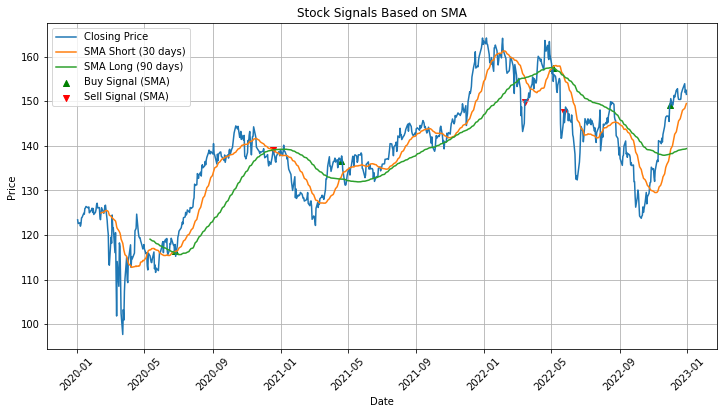

In [25]:
# Plot the closing prices with buy and sell signals based on SMA
plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Closing Price')
plt.plot(dates, sma_short, label='SMA Short (30 days)')
plt.plot(dates, sma_long, label='SMA Long (90 days)')
plt.scatter(dates[buy_sma], closing_prices[buy_sma], marker='^', color='g', label='Buy Signal (SMA)')
plt.scatter(dates[sell_sma], closing_prices[sell_sma], marker='v', color='r', label='Sell Signal (SMA)')
plt.title('Stock Signals Based on SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

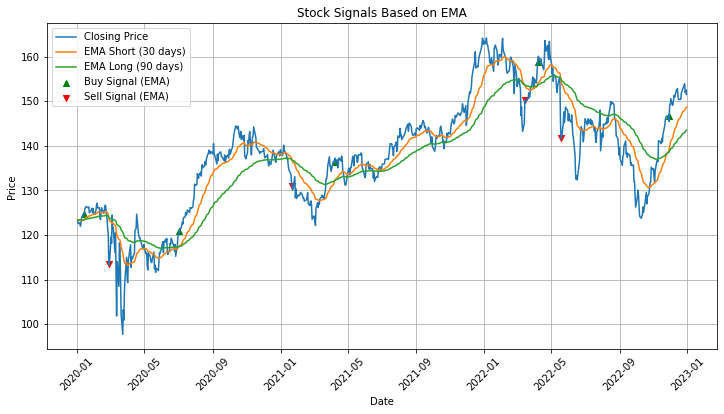

In [26]:
# Plot the closing prices with buy and sell signals based on EMA
plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Closing Price')
plt.plot(dates, ema_short, label='EMA Short (30 days)')
plt.plot(dates, ema_long, label='EMA Long (90 days)')
plt.scatter(dates[buy_ema], closing_prices[buy_ema], marker='^', color='g', label='Buy Signal (EMA)')
plt.scatter(dates[sell_ema], closing_prices[sell_ema], marker='v', color='r', label='Sell Signal (EMA)')
plt.title('Stock Signals Based on EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Forecasting

In [27]:
# Extract the date and closing prices
df = data[['Date', 'Close']]
df.columns = ['ds', 'y']

In [28]:
# Convert the 'ds' column to datetime type
df['ds'] = pd.to_datetime(df['ds'])

/var/folders/3_/4zcfm8q95td3zxq1xkmtz8kr0000gn/T/ipykernel_31203/854574570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [29]:
# Create a new Prophet instance
model = Prophet()

In [30]:
# Fit the model to the data
model.fit(df)

11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:37 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Generate future dates for the prediction
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08
...,...
1116,2023-12-26
1117,2023-12-27
1118,2023-12-28
1119,2023-12-29


In [32]:
# Make the prediction
forecast = model.predict(future_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,117.444639,122.563391,130.246900,117.444639,117.444639,9.008726,9.008726,9.008726,-1.162604,-1.162604,-1.162604,10.171329,10.171329,10.171329,0.0,0.0,0.0,126.453365
1,2020-01-03,117.380025,123.016956,130.689160,117.380025,117.380025,9.319297,9.319297,9.319297,-0.946673,-0.946673,-0.946673,10.265970,10.265970,10.265970,0.0,0.0,0.0,126.699322
2,2020-01-06,117.186184,122.824746,130.321389,117.186184,117.186184,9.503477,9.503477,9.503477,-0.911441,-0.911441,-0.911441,10.414917,10.414917,10.414917,0.0,0.0,0.0,126.689661
3,2020-01-07,117.121571,122.748313,130.082104,117.121571,117.121571,9.349960,9.349960,9.349960,-1.072405,-1.072405,-1.072405,10.422366,10.422366,10.422366,0.0,0.0,0.0,126.471531
4,2020-01-08,117.056957,122.650998,129.896017,117.056957,117.056957,9.336561,9.336561,9.336561,-1.074305,-1.074305,-1.074305,10.410867,10.410867,10.410867,0.0,0.0,0.0,126.393518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2023-12-26,134.668066,74.467046,205.772032,66.967912,197.647181,7.816477,7.816477,7.816477,-1.072405,-1.072405,-1.072405,8.888882,8.888882,8.888882,0.0,0.0,0.0,142.484542
1117,2023-12-27,134.642520,75.075702,205.673270,66.466378,197.715430,8.058521,8.058521,8.058521,-1.074305,-1.074305,-1.074305,9.132826,9.132826,9.132826,0.0,0.0,0.0,142.701041
1118,2023-12-28,134.616973,74.389268,206.730750,66.066545,197.789235,8.195892,8.195892,8.195892,-1.162604,-1.162604,-1.162604,9.358495,9.358495,9.358495,0.0,0.0,0.0,142.812865
1119,2023-12-29,134.591427,75.768587,207.114306,65.755081,197.863039,8.617817,8.617817,8.617817,-0.946673,-0.946673,-0.946673,9.564490,9.564490,9.564490,0.0,0.0,0.0,143.209245


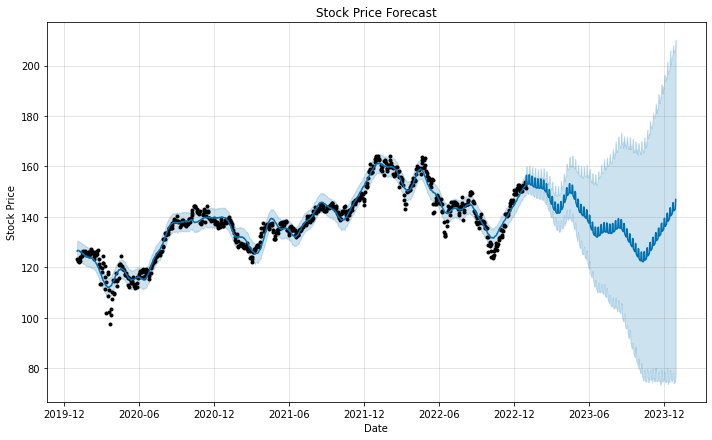

In [33]:
# Plot the forecast
model.plot(forecast, xlabel='Date', ylabel='Stock Price')
plt.title('Stock Price Forecast')
plt.show()